### Speech2Text (STT)

###### Downloading Necessary Packages

In [ ]:
!pip install -qU datasets transformers[torch] huggingface_hub evaluate jiwer accelerate

###### Logging In to the Hub

In [ ]:
# logging in to Hub to push checkpoints
from huggingface_hub import notebook_login

notebook_login()

###### Loading the HF Datasets

In [ ]:
# Loading Common Vioce Dataset (Yoruba)
from datasets import load_dataset, DatasetDict

common_voice = DatasetDict()
common_voice["train"] = load_dataset("mozilla-foundation/common_voice_17_0", "yo", split="train+validation+other+validated", trust_remote_code=True)
common_voice["test"] = load_dataset("mozilla-foundation/common_voice_17_0", "yo", split="test", trust_remote_code=True)

print(common_voice)

DatasetDict({
    train: Dataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment', 'variant'],
        num_rows: 6266
    })
    test: Dataset({
        features: ['client_id', 'path', 'audio', 'sentence', 'up_votes', 'down_votes', 'age', 'gender', 'accent', 'locale', 'segment', 'variant'],
        num_rows: 999
    })
})


In [ ]:
# Loading Common Vioce Dataset (English)
import numpy as np
from datasets import Dataset, Audio

common_voice_eng = load_dataset("mozilla-foundation/common_voice_17_0", "en", split="train", streaming=True, trust_remote_code=True) # Load the "test" split of the Common Voice 17.0 dataset for English
common_voice_eng = list(common_voice_eng.take(1000)) # Select the first 250 samples from the loaded test dataset (as a list)

# Converting list back to Dataset (from List)
common_voice_eng = Dataset.from_dict({"audio":    np.array([item["audio"] for item in common_voice_eng]),
                                       "sentence": [item["sentence"] for item in common_voice_eng]})
common_voice_eng = common_voice_eng.cast_column("audio", Audio())
print(common_voice_eng)

Reading metadata...: 1101170it [00:19, 55126.93it/s]


Dataset({
    features: ['audio', 'sentence'],
    num_rows: 1000
})


In [ ]:
# Loading Common Vioce Dataset (English Test)
common_voice_eng_test = load_dataset("mozilla-foundation/common_voice_17_0", "en", split="test", streaming=True, trust_remote_code=True) # Load the "test" split of the Common Voice 17.0 dataset for English
common_voice_eng_test = list(common_voice_eng_test.take(250)) # Select the first 250 samples from the loaded test dataset (as a list)

# Converting list back to Dataset (from List)
common_voice_eng_test = Dataset.from_dict({"audio":    np.array([item["audio"] for item in common_voice_eng_test]),
                                       "sentence": [item["sentence"] for item in common_voice_eng_test]})
common_voice_eng_test = common_voice_eng_test.cast_column("audio", Audio())
print(common_voice_eng_test)

Reading metadata...: 16393it [00:00, 45402.77it/s]


Dataset({
    features: ['audio', 'sentence'],
    num_rows: 250
})


In [ ]:
# Loading Google Fluers
fleurs = DatasetDict()
fleurs["train"] = load_dataset("google/fleurs", "yo_ng", split="train+validation", trust_remote_code=True)
fleurs["test"] = load_dataset("google/fleurs", "yo_ng", split="test", trust_remote_code=True)

print(fleurs)

DatasetDict({
    train: Dataset({
        features: ['id', 'num_samples', 'path', 'audio', 'transcription', 'raw_transcription', 'gender', 'lang_id', 'language', 'lang_group_id'],
        num_rows: 2717
    })
    test: Dataset({
        features: ['id', 'num_samples', 'path', 'audio', 'transcription', 'raw_transcription', 'gender', 'lang_id', 'language', 'lang_group_id'],
        num_rows: 831
    })
})


In [ ]:
# Loading Google Fluers Dataset (English)
import numpy as np
from datasets import Dataset, Audio

fleurs_eng = load_dataset("google/fleurs", "en_us", split="train", streaming=True, trust_remote_code=True) # Load the "test" split of the Fleurs dataset for English
fleurs_eng = list(fleurs_eng.take(1000)) # Select the first 1000 samples from the loaded test dataset (as a list)

# Converting list back to Dataset (from List)
fleurs_eng = Dataset.from_dict({"audio":    np.array([item["audio"] for item in fleurs_eng]),
                                       "sentence": [item["transcription"] for item in fleurs_eng]})
fleurs_eng = fleurs_eng.cast_column("audio", Audio())
print(fleurs_eng)

Dataset({
    features: ['audio', 'sentence'],
    num_rows: 1000
})


In [ ]:
# Loading Google Fluers Dataset (English Test)
fleurs_eng_test = load_dataset("google/fleurs", "en_us", split="test", streaming=True, trust_remote_code=True) # Load the "test" split of the Fleurs dataset for English
fleurs_eng_test = list(fleurs_eng_test.take(250)) # Select the first 1000 samples from the loaded test dataset (as a list)

# Converting list back to Dataset (from List)
fleurs_eng_test = Dataset.from_dict({"audio":    np.array([item["audio"] for item in fleurs_eng_test]),
                                       "sentence": [item["transcription"] for item in fleurs_eng_test]})
fleurs_eng_test = fleurs_eng_test.cast_column("audio", Audio())
print(fleurs_eng_test)

Dataset({
    features: ['audio', 'sentence'],
    num_rows: 250
})


In [ ]:
# Getting More Datasets
yoruba_data1 = load_dataset("babs/openslr-yoruba", split="train", trust_remote_code=True)
yoruba_data2 = load_dataset("babs/yoruba-data", split="train", trust_remote_code=True)
yoruba_data3 = load_dataset("odunola/yoruba_audio_data", split="train", trust_remote_code=True)

Resolving data files:   0%|          | 0/27 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/27 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
# Loading Tedlium Dataset (English)
tedlium_eng = load_dataset("LIUM/tedlium", "release3", split="train", streaming=True, trust_remote_code=True) # Load the "test" split of the TEDLIUM dataset for English
tedlium_eng = list(tedlium_eng.take(1000)) # Select the first 1000 samples from the loaded test dataset (as a list)

# Converting list back to Dataset (from List)
tedlium_eng = Dataset.from_dict({"audio":    np.array([item["audio"] for item in tedlium_eng]),
                                       "sentence": [item["text"] for item in tedlium_eng]})
tedlium_eng = tedlium_eng.cast_column("audio", Audio())
print(tedlium_eng)

Dataset({
    features: ['audio', 'sentence'],
    num_rows: 1000
})


In [ ]:
# Loading Tedlium Dataset (English Test)
tedlium_eng_test = load_dataset("LIUM/tedlium", "release3", split="test", streaming=True, trust_remote_code=True) # Load the "test" split of the Tedlium dataset for English
tedlium_eng_test = list(tedlium_eng_test.take(250)) # Select the first 250 samples from the loaded test dataset (as a list)

# Converting list back to Dataset (from List)
tedlium_eng_test = Dataset.from_dict({"audio":    np.array([item["audio"] for item in tedlium_eng_test]),
                                       "sentence": [item["text"] for item in tedlium_eng_test]})
tedlium_eng_test = tedlium_eng_test.cast_column("audio", Audio())
print(tedlium_eng_test)

Dataset({
    features: ['audio', 'sentence'],
    num_rows: 250
})


In [ ]:
tedlium_eng_test[0]

{'audio': {'path': None,
  'array': array([ 0.        ,  0.        ,  0.        , ...,  0.0017395 ,
         -0.00805664, -0.00964355]),
  'sampling_rate': 16000},
 'sentence': 'ignore_time_segment_in_scoring'}

In [ ]:
# Loading Librispeech Dataset (English)
libris_speech_eng = load_dataset("openslr/librispeech_asr", "clean", split="validation", streaming=True, trust_remote_code=True) # Load the "test" split of the TEDLIUM dataset for English
libris_speech_eng = list(libris_speech_eng.take(1000)) # Select the first 1000 samples from the loaded test dataset (as a list)

# Converting list back to Dataset (from List)
libris_speech_eng = Dataset.from_dict({"audio":    np.array([item["audio"] for item in libris_speech_eng]),
                                       "sentence": [item["text"] for item in libris_speech_eng]})
libris_speech_eng = libris_speech_eng.cast_column("audio", Audio())
print(libris_speech_eng)

Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/64 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

Dataset({
    features: ['audio', 'sentence'],
    num_rows: 1000
})


In [ ]:
# Loading Librispeech Dataset (English Test)
libris_speech_eng_test = load_dataset("openslr/librispeech_asr", "clean", split="test", streaming=True, trust_remote_code=True) # Load the "test" split of the Tedlium dataset for English
libris_speech_eng_test = list(libris_speech_eng_test.take(250)) # Select the first 250 samples from the loaded test dataset (as a list)

# Converting list back to Dataset (from List)
libris_speech_eng_test = Dataset.from_dict({"audio":    np.array([item["audio"] for item in libris_speech_eng_test]),
                                       "sentence": [item["text"] for item in libris_speech_eng_test]})
libris_speech_eng_test = libris_speech_eng_test.cast_column("audio", Audio())
print(libris_speech_eng_test)

Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/64 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

Dataset({
    features: ['audio', 'sentence'],
    num_rows: 250
})


In [ ]:
libris_speech_eng[0]

{'audio': {'path': None,
  'array': array([ 0.00186157,  0.0005188 ,  0.00024414, ..., -0.00097656,
         -0.00109863, -0.00146484]),
  'sampling_rate': 16000},
 'sentence': "HE WAS IN A FEVERED STATE OF MIND OWING TO THE BLIGHT HIS WIFE'S ACTION THREATENED TO CAST UPON HIS ENTIRE FUTURE"}

In [ ]:
# Getting rid of unused columns (and renaming columns)
common_voice = common_voice.select_columns(["audio", "sentence"])

fleurs = fleurs.select_columns(["audio", "raw_transcription"])
fleurs = fleurs.rename_column("raw_transcription", "sentence")

yoruba_data1 = yoruba_data1.select_columns(["audio", "transcription"])
yoruba_data1 = yoruba_data1.rename_column("transcription", "sentence")

yoruba_data2 = yoruba_data2.select_columns(["audio", "sentence"])
yoruba_data3 = yoruba_data3.select_columns(["audio", "sentence"])

In [ ]:
print(common_voice)
print(common_voice_eng)
print(common_voice_eng_test)
print(fleurs)
print(fleurs_eng)
print(fleurs_eng_test)
print(yoruba_data1)
print(yoruba_data2)
print(yoruba_data3)

DatasetDict({
    train: Dataset({
        features: ['audio', 'sentence'],
        num_rows: 6266
    })
    test: Dataset({
        features: ['audio', 'sentence'],
        num_rows: 999
    })
})
Dataset({
    features: ['audio', 'sentence'],
    num_rows: 1000
})
Dataset({
    features: ['audio', 'sentence'],
    num_rows: 250
})
DatasetDict({
    train: Dataset({
        features: ['audio', 'sentence'],
        num_rows: 2717
    })
    test: Dataset({
        features: ['audio', 'sentence'],
        num_rows: 831
    })
})
Dataset({
    features: ['audio', 'sentence'],
    num_rows: 1000
})
Dataset({
    features: ['audio', 'sentence'],
    num_rows: 250
})
Dataset({
    features: ['audio', 'sentence'],
    num_rows: 3583
})
Dataset({
    features: ['audio', 'sentence'],
    num_rows: 25802
})
Dataset({
    features: ['audio', 'sentence'],
    num_rows: 11506
})


In [ ]:
print(common_voice["train"][0])
print(fleurs["train"][0])

{'audio': {'path': '/root/.cache/huggingface/datasets/downloads/extracted/57552c9e376085f1bc45d7b4e7ab8ad4e263e2524361592fe3fbb4268fa649b0/yo_train_0/common_voice_yo_36840058.mp3', 'array': array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       6.13843998e-09, 4.96209518e-09, 2.56767763e-09]), 'sampling_rate': 48000}, 'sentence': 'Ọmọ ẹgbẹ́ òkùnkùn dèrò àtìmọ́lé torí nílùú Ìbàdàn.'}
{'audio': {'path': 'train/10001507374131186531.wav', 'array': array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
       -7.93933868e-05,  2.30669975e-05, -1.90734863e-05]), 'sampling_rate': 16000}, 'sentence': 'Dr.Lee náà fi ẹ̀dùn ọkàn hàn lórí ìrìyìn pé àwọn ọmọ tó wà ní ilẹ̀ Turkey ti kó kòkòrò A(H5N1) èyí tó jẹ́ ààrùn kòkòrò avian influenza láláì se àìsàn.'}


###### Processing the Dataset

In [ ]:
# Loading our Processor from pre-trained checkpoint (to get correct sample rate)
from transformers import WhisperProcessor

processor = WhisperProcessor.from_pretrained("openai/whisper-small", language="yoruba", task="transcribe")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
# Downsampling to 16kHz (as expected by Whisper)
from datasets import Audio

print(f"Original sampling rate: {common_voice['train'].features}")
sampling_rate = processor.feature_extractor.sampling_rate
common_voice = common_voice.cast_column("audio", Audio(sampling_rate=sampling_rate))
common_voice_eng = common_voice_eng.cast_column("audio", Audio(sampling_rate=sampling_rate))
yoruba_data1 = yoruba_data1.cast_column("audio", Audio(sampling_rate=sampling_rate))
yoruba_data2 = yoruba_data2.cast_column("audio", Audio(sampling_rate=sampling_rate))
yoruba_data3 = yoruba_data3.cast_column("audio", Audio(sampling_rate=sampling_rate))
common_voice_eng_test = common_voice_eng_test.cast_column("audio", Audio(sampling_rate=sampling_rate))
fleurs = fleurs.cast_column("audio", Audio(sampling_rate=sampling_rate))
fleurs_eng = fleurs_eng.cast_column("audio", Audio(sampling_rate=sampling_rate))
fleurs_eng_test = fleurs_eng_test.cast_column("audio", Audio(sampling_rate=sampling_rate))
tedlium_eng = tedlium_eng.cast_column("audio", Audio(sampling_rate=sampling_rate))
tedlium_eng_test = tedlium_eng_test.cast_column("audio", Audio(sampling_rate=sampling_rate))
libris_speech_eng = libris_speech_eng.cast_column("audio", Audio(sampling_rate=sampling_rate))
libris_speech_eng_test = libris_speech_eng_test.cast_column("audio", Audio(sampling_rate=sampling_rate))
print(f"New sampling rate.    : {common_voice['train'].features}")

Original sampling rate: {'audio': Audio(sampling_rate=48000, mono=True, decode=True, id=None), 'sentence': Value(dtype='string', id=None)}
New sampling rate.    : {'audio': Audio(sampling_rate=16000, mono=True, decode=True, id=None), 'sentence': Value(dtype='string', id=None)}


In [ ]:
# Checking Sampling rate
print(f"Original common_voice sampling rate: {common_voice['train'].features}")
print(f"Original fleurs sampling rate: {fleurs['train'].features}")
print(f"Original yoruba_data1 sampling rate: {yoruba_data1.features}")

Original common_voice sampling rate: {'audio': Audio(sampling_rate=16000, mono=True, decode=True, id=None), 'sentence': Value(dtype='string', id=None)}
Original fleurs sampling rate: {'audio': Audio(sampling_rate=16000, mono=True, decode=True, id=None), 'sentence': Value(dtype='string', id=None)}
Original yoruba_data1 sampling rate: {'audio': Audio(sampling_rate=16000, mono=True, decode=True, id=None), 'sentence': Value(dtype='string', id=None)}


In [ ]:
# Concatenating both datasets
from datasets import concatenate_datasets

# Trial 1 (Only Yoruba data)
train_dataset = concatenate_datasets([common_voice["train"], fleurs["train"], yoruba_data1, yoruba_data2, yoruba_data3])
test_dataset = concatenate_datasets([common_voice["test"], fleurs["test"]])

# Trial 2 (English data Included)
# train_dataset = concatenate_datasets([common_voice["train"], fleurs["train"], yoruba_data1, yoruba_data2, yoruba_data3, common_voice_eng, fleurs_eng, tedlium_eng, libris_speech_eng])
# test_dataset = concatenate_datasets([common_voice["test"], fleurs["test"], common_voice_eng_test, fleurs_eng_test, tedlium_eng_test, libris_speech_eng_test])

# Create a new DatasetDict with the concatenated train and test datasets
combined_dataset = DatasetDict({
    "train": train_dataset,
    "test": test_dataset
})

print(combined_dataset)

DatasetDict({
    train: Dataset({
        features: ['audio', 'sentence'],
        num_rows: 49874
    })
    test: Dataset({
        features: ['audio', 'sentence'],
        num_rows: 1830
    })
})


In [ ]:
# Shuffling the dataset
combined_dataset['train'] = combined_dataset['train'].shuffle(seed=42)
combined_dataset['test'] = combined_dataset['test'].shuffle(seed=42)

In [ ]:
# Reusing the common_voice variable
common_voice = combined_dataset
common_voice

DatasetDict({
    train: Dataset({
        features: ['audio', 'sentence'],
        num_rows: 49874
    })
    test: Dataset({
        features: ['audio', 'sentence'],
        num_rows: 1830
    })
})

In [ ]:
# Prepaing Dataset and Removing Unwanted columns
def prepare_dataset(example):
    audio = example["audio"]

    example = processor(
        audio=audio["array"],
        sampling_rate=audio["sampling_rate"],
        text=example["sentence"],
    )

    # compute input length of audio sample in seconds
    example["input_length"] = len(audio["array"]) / audio["sampling_rate"]

    return example

common_voice = common_voice.map(prepare_dataset, remove_columns=common_voice.column_names["train"], num_proc=4)
common_voice

Map (num_proc=4):   0%|          | 0/49874 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/1830 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input_features', 'labels', 'input_length'],
        num_rows: 49874
    })
    test: Dataset({
        features: ['input_features', 'labels', 'input_length'],
        num_rows: 1830
    })
})

In [ ]:
# Filtering samples longer than 30s
max_input_length = 30.0

def is_audio_in_length_range(length):
    return length < max_input_length

common_voice["train"] = common_voice["train"].filter(
is_audio_in_length_range,
input_columns=["input_length"],
)
common_voice

Filter:   0%|          | 0/49874 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['input_features', 'labels', 'input_length'],
        num_rows: 49684
    })
    test: Dataset({
        features: ['input_features', 'labels', 'input_length'],
        num_rows: 1830
    })
})

In [ ]:
def compute_total_audio_length(dataset_dict):
    """
    Compute the total audio length for train and test splits in the given dataset dictionary.

    Args:
    dataset_dict (DatasetDict): A dataset dictionary containing 'train' and 'test' splits with 'input_length' column.

    Returns:
    dict: A dictionary with the total audio length for 'train' and 'test' splits.
    """
    total_length = {}

    # Compute the total length for the train split
    train_length = sum(dataset_dict["train"]["input_length"])
    total_length["train"] = train_length

    # Compute the total length for the test split
    test_length = sum(dataset_dict["test"]["input_length"])
    total_length["test"] = test_length

    return total_length

# Example usage
total_audio_length = compute_total_audio_length(common_voice)
print(total_audio_length)

{'train': 402788.1841874865, 'test': 19722.936000000005}


In [ ]:
# Define a Data Collator
import torch

from dataclasses import dataclass
from typing import Any, Dict, List, Union


@dataclass
class DataCollatorSpeechSeq2SeqWithPadding:
    processor: Any

    def __call__(
        self, features: List[Dict[str, Union[List[int], torch.Tensor]]]
    ) -> Dict[str, torch.Tensor]:
        # split inputs and labels since they have to be of different lengths and need different padding methods
        # first treat the audio inputs by simply returning torch tensors
        input_features = [
            {"input_features": feature["input_features"][0]} for feature in features
        ]
        batch = self.processor.feature_extractor.pad(input_features, return_tensors="pt")

        # get the tokenized label sequences
        label_features = [{"input_ids": feature["labels"]} for feature in features]
        # pad the labels to max length
        labels_batch = self.processor.tokenizer.pad(label_features, return_tensors="pt")

        # replace padding with -100 to ignore loss correctly
        labels = labels_batch["input_ids"].masked_fill(
            labels_batch.attention_mask.ne(1), -100
        )

        # if bos token is appended in previous tokenization step,
        # cut bos token here as it's append later anyways
        if (labels[:, 0] == self.processor.tokenizer.bos_token_id).all().cpu().item():
            labels = labels[:, 1:]

        batch["labels"] = labels

        return batch

data_collator = DataCollatorSpeechSeq2SeqWithPadding(processor=processor)

###### Loading the Model

In [ ]:
# Setting up the WER evaluation metrics
import evaluate

metric = evaluate.load("wer")

from transformers.models.whisper.english_normalizer import BasicTextNormalizer

normalizer = BasicTextNormalizer()


def compute_metrics(pred):
    pred_ids = pred.predictions
    label_ids = pred.label_ids

    # replace -100 with the pad_token_id
    label_ids[label_ids == -100] = processor.tokenizer.pad_token_id

    # we do not want to group tokens when computing the metrics
    pred_str = processor.batch_decode(pred_ids, skip_special_tokens=True)
    label_str = processor.batch_decode(label_ids, skip_special_tokens=True)

    # compute orthographic wer
    wer_ortho = 100 * metric.compute(predictions=pred_str, references=label_str)

    # compute normalised WER
    pred_str_norm = [normalizer(pred) for pred in pred_str]
    label_str_norm = [normalizer(label) for label in label_str]
    # filtering step to only evaluate the samples that correspond to non-zero references:
    pred_str_norm = [
        pred_str_norm[i] for i in range(len(pred_str_norm)) if len(label_str_norm[i]) > 0
    ]
    label_str_norm = [
        label_str_norm[i]
        for i in range(len(label_str_norm))
        if len(label_str_norm[i]) > 0
    ]

    wer = 100 * metric.compute(predictions=pred_str_norm, references=label_str_norm)

    return {"wer_ortho": wer_ortho, "wer": wer}

In [ ]:
# Loading Model Pretrained Checkpoint
from transformers import WhisperForConditionalGeneration

model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-small")

from functools import partial

# disable cache during training since it's incompatible with gradient checkpointing
model.config.use_cache = False

# set language and task for generation and re-enable cache
model.generate = partial(
    model.generate, language="yoruba", task="transcribe", use_cache=True
)

config.json:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.87k [00:00<?, ?B/s]

###### Training the Model

In [ ]:
# Defining the Training Configuration
from transformers import Seq2SeqTrainingArguments
import accelerate
print(accelerate.__version__)  # Should be 0.21.0 or higher

num_train_epochs = 1
max_train_steps =1000
batch_size = 16

training_args = Seq2SeqTrainingArguments(
    output_dir="./whisper-small-yoruba-07-17",  # name on the HF Hub
    per_device_train_batch_size=batch_size,
    gradient_accumulation_steps=1,  # increase by 2x for every 2x decrease in batch size
    learning_rate=1e-5,
    lr_scheduler_type="linear", # linear schedule (set lr_scheduler_type="linear"), as this will yield an additional performance boost over long training runs.
    warmup_steps=50,
    #max_steps=max_train_steps,  # increase to 4000 if you have your own GPU or a Colab paid plan
    gradient_checkpointing=True,
    fp16=True,
    fp16_full_eval=True,
    evaluation_strategy="steps",
    per_device_eval_batch_size=batch_size,
    num_train_epochs=num_train_epochs,
    predict_with_generate=True,
    generation_max_length=225,
    save_steps=250,
    eval_steps=250,
    logging_steps=25,
    report_to=["tensorboard"],
    load_best_model_at_end=True,
    metric_for_best_model="wer",
    greater_is_better=False,
    push_to_hub=True,
)

0.32.1


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# Training the Model
from transformers import Seq2SeqTrainer

trainer = Seq2SeqTrainer(
    args=training_args,
    model=model,
    train_dataset=common_voice["train"],
    eval_dataset=common_voice["test"],
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    tokenizer=processor,
)
trainer.train()

/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint: the use_reentrant parameter should be passed explicitly. In version 2.4 we will raise an exception if use_reentrant is not passed. use_reentrant=False is recommended, but if you need to preserve the current default behavior, you can pass use_reentrant=True. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Step,Training Loss,Validation Loss,Wer Ortho,Wer
250,0.795100,0.800042,60.465069,45.959711
500,0.605000,0.640793,50.317554,39.312049
750,0.527300,0.562115,45.865714,35.752566
1000,0.448300,0.513750,43.434856,33.890156
1250,0.415800,0.475197,41.913033,32.529456


You have passed task=transcribe, but also have set `forced_decoder_ids` to [[1, None], [2, 50359]] which creates a conflict. `forced_decoder_ids` will be ignored in favor of task=transcribe.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token.As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 448, 'suppress_tokens': [1, 2, 7, 8, 9, 10, 14, 25, 26, 27, 28, 29, 31, 58, 59, 60, 61, 62, 63, 90, 91, 92, 93, 359, 503, 522, 542, 873, 893, 902, 918, 922, 931, 1350, 1853, 1982, 2460, 2627, 3246, 3253, 3268, 3536, 3846, 3961, 4183, 4667, 65

Step,Training Loss,Validation Loss,Wer Ortho,Wer
250,0.795100,0.800042,60.465069,45.959711
500,0.605000,0.640793,50.317554,39.312049
750,0.527300,0.562115,45.865714,35.752566
1000,0.448300,0.513750,43.434856,33.890156
1250,0.415800,0.475197,41.913033,32.529456
1500,0.403200,0.443391,41.186616,31.624857
1750,0.326100,0.415314,40.218737,30.319270
2000,0.360600,0.391015,38.065864,29.104903
2250,0.300800,0.376906,36.708398,27.540859
2500,0.293800,0.360765,36.298521,27.092360


Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 448, 'suppress_tokens': [1, 2, 7, 8, 9, 10, 14, 25, 26, 27, 28, 29, 31, 58, 59, 60, 61, 62, 63, 90, 91, 92, 93, 359, 503, 522, 542, 873, 893, 902, 918, 922, 931, 1350, 1853, 1982, 2460, 2627, 3246, 3253, 3268, 3536, 3846, 3961, 4183, 4667, 6585, 6647, 7273, 9061, 9383, 10428, 10929, 11938, 12033, 12331, 12562, 13793, 14157, 14635, 15265, 15618, 16553, 16604, 18362, 18956, 20075, 21675, 22520, 26130, 26161, 26435, 28279, 29464, 31650, 32302, 32470, 36865, 42863, 47425, 49870, 50254, 50258, 50360, 50361, 50362], 'begin_suppress_tokens': [220, 50257]}
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:464: UserWarning: torch.utils.checkpoint

TrainOutput(global_step=3356, training_loss=0.4748641013814951, metrics={'train_runtime': 28502.1205, 'train_samples_per_second': 1.883, 'train_steps_per_second': 0.118, 'total_flos': 1.549155287457792e+19, 'train_loss': 0.4748641013814951, 'epoch': 1.0})

###### Pushing Model to Hub

In [ ]:
# Pushing the Final Checkpoint to Hub
kwargs = {
    "dataset_tags": "mozilla-foundation/common_voice_13_0",
    "dataset": "Common Voice 13",  # a 'pretty' name for the training dataset
    "language": "yo",
    "model_name": "Whisper Small YO - Chris Ibe",  # a 'pretty' name for your model
    "finetuned_from": "openai/whisper-small",
    "tasks": "automatic-speech-recognition",
}
trainer.push_to_hub()

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 448, 'suppress_tokens': [1, 2, 7, 8, 9, 10, 14, 25, 26, 27, 28, 29, 31, 58, 59, 60, 61, 62, 63, 90, 91, 92, 93, 359, 503, 522, 542, 873, 893, 902, 918, 922, 931, 1350, 1853, 1982, 2460, 2627, 3246, 3253, 3268, 3536, 3846, 3961, 4183, 4667, 6585, 6647, 7273, 9061, 9383, 10428, 10929, 11938, 12033, 12331, 12562, 13793, 14157, 14635, 15265, 15618, 16553, 16604, 18362, 18956, 20075, 21675, 22520, 26130, 26161, 26435, 28279, 29464, 31650, 32302, 32470, 36865, 42863, 47425, 49870, 50254, 50258, 50360, 50361, 50362], 'begin_suppress_tokens': [220, 50257]}


CommitInfo(commit_url='https://huggingface.co/ccibeekeoc42/whisper-small-yoruba-07-17/commit/b534939d425aad77a748562901f5910a59d33b99', commit_message='End of training', commit_description='', oid='b534939d425aad77a748562901f5910a59d33b99', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
# Sharing/ Using Model
from transformers import pipeline

pipe = pipeline("automatic-speech-recognition", model="ccibeekeoc42/whisper-small-yoruba")

###### Plotting

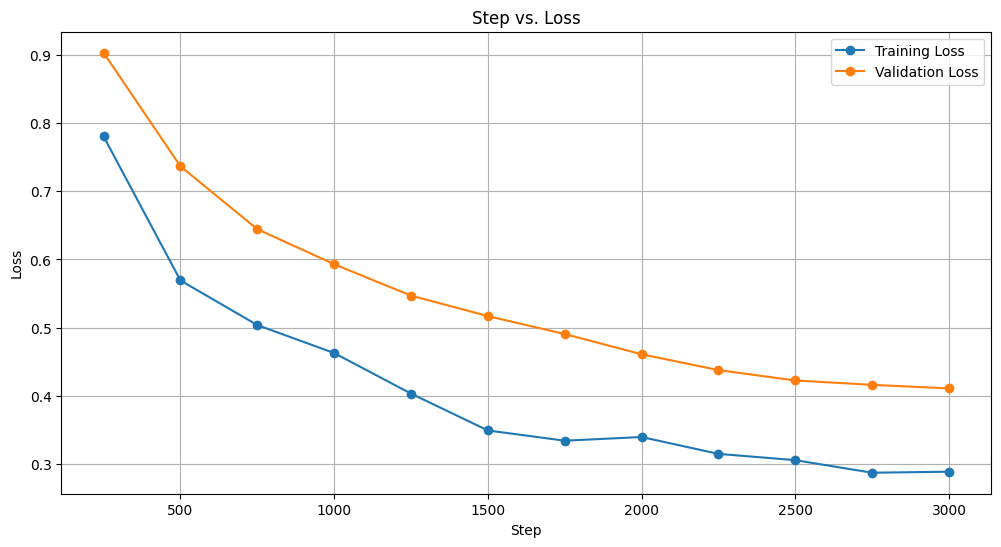

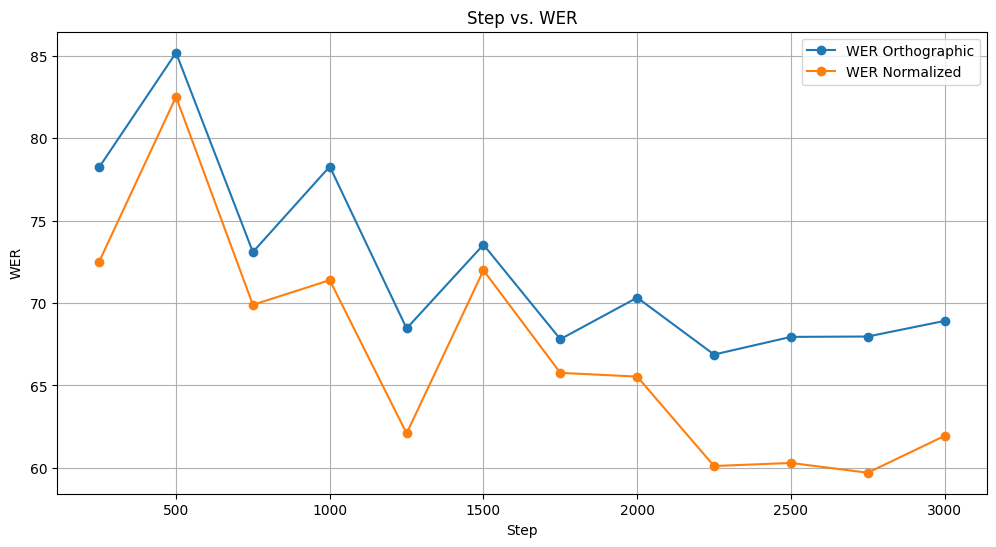

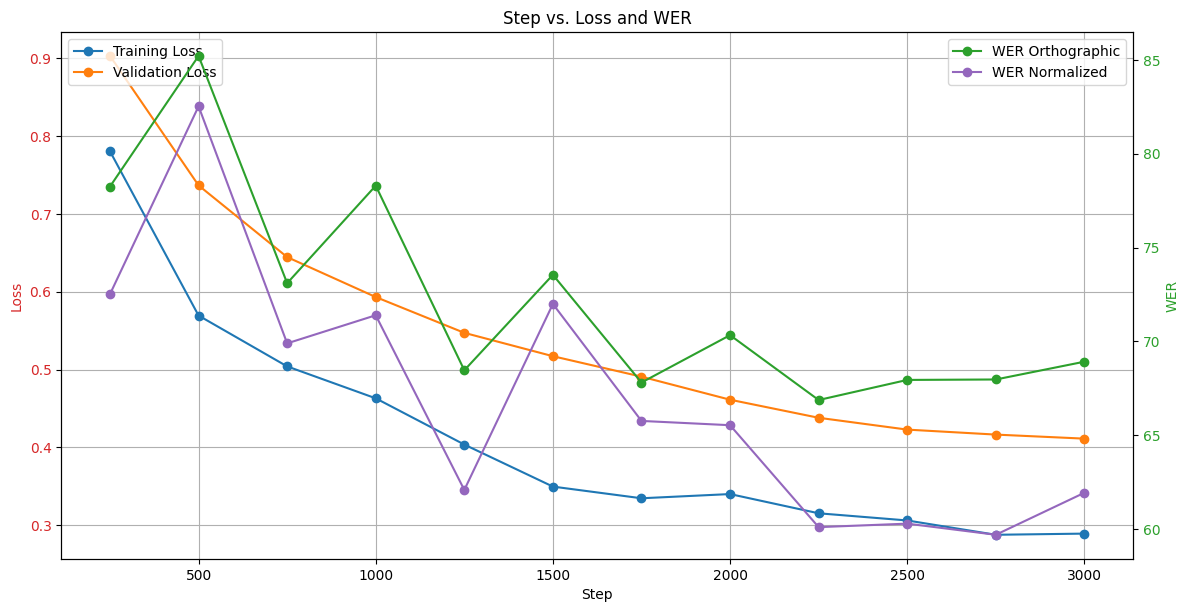

In [ ]:
import matplotlib.pyplot as plt

# Data (Trial 1 Only Yoruba data)
steps = [250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000]
training_loss = [0.7803, 0.5693, 0.504, 0.463, 0.4036, 0.3496, 0.3346, 0.34, 0.3153, 0.3061, 0.2877, 0.2892]
validation_loss = [0.9028, 0.7365, 0.6444, 0.5931, 0.5471, 0.5171, 0.4908, 0.4612, 0.438, 0.4228, 0.4164, 0.4112]
wer_ortho = [78.2451, 85.1996, 73.1001, 78.2923, 68.4638, 73.5459, 67.8109, 70.3336, 66.8799, 67.9499, 67.9735, 68.9201]
wer = [72.5162, 82.5191, 69.8969, 71.393, 62.0921, 71.9933, 65.7669, 65.5394, 60.1118, 60.2982, 59.7051, 61.942]

# # Data (Trial 2 English data Included)
# steps = [250, 500, 750, 1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250]
# training_loss = [0.7951, 0.605, 0.5273, 0.4483, 0.4158, 0.4032, 0.3261, 0.3606, 0.3008, 0.2938, 0.2933, 0.277, 0.2849]
# validation_loss = [0.800042, 0.640793, 0.562115, 0.51375, 0.475197, 0.443391, 0.415314, 0.391015, 0.376906, 0.360765, 0.349412, 0.340355, 0.334607]
# wer_ortho = [60.465069, 50.317554, 45.865714, 43.434856, 41.913033, 41.186616, 40.218737, 38.065864, 36.708398, 36.298521, 35.608628, 34.54741, 34.506828]
# wer = [45.959711, 39.312049, 35.752566, 33.890156, 32.529456, 31.624857, 30.31927, 29.104903, 27.540859, 27.09236, 27.04485, 25.568225, 25.676549]

# Plot Step vs. Loss
plt.figure(figsize=(12, 6))
plt.plot(steps, training_loss, label='Training Loss', marker='o')
plt.plot(steps, validation_loss, label='Validation Loss', marker='o')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Step vs. Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Step vs. WER
plt.figure(figsize=(12, 6))
plt.plot(steps, wer_ortho, label='WER Orthographic', marker='o')
plt.plot(steps, wer, label='WER Normalized', marker='o')
plt.xlabel('Step')
plt.ylabel('WER')
plt.title('Step vs. WER')
plt.legend()
plt.grid(True)
plt.show()

# Plot all in one graph for better comparison
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Step')
ax1.set_ylabel('Loss', color=color)
ax1.plot(steps, training_loss, label='Training Loss', color='tab:blue', marker='o')
ax1.plot(steps, validation_loss, label='Validation Loss', color='tab:orange', marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')
ax1.grid(True)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:green'
ax2.set_ylabel('WER', color=color)  # we already handled the x-label with ax1
ax2.plot(steps, wer_ortho, label='WER Orthographic', color='tab:green', marker='o')
ax2.plot(steps, wer, label='WER Normalized', color='tab:purple', marker='o')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Step vs. Loss and WER')
plt.show()
